# Portfolio Analysis

## I. Data Exploration

In [1]:
!pip install quantstats

     |████████████████████████████████| 40 kB 9.7 MB/s             
     |████████████████████████████████| 39.3 MB 25.6 MB/s            
     |████████████████████████████████| 292 kB 91.1 MB/s            
     |████████████████████████████████| 11.7 MB 84.7 MB/s            
     |████████████████████████████████| 16.8 MB 86.8 MB/s            
     |████████████████████████████████| 11.3 MB 84.5 MB/s            
     |████████████████████████████████| 895 kB 81.5 MB/s            
     |████████████████████████████████| 40 kB 10.9 MB/s            
     |████████████████████████████████| 247 kB 99.1 MB/s            
     |████████████████████████████████| 1.2 MB 81.3 MB/s            
     |████████████████████████████████| 4.3 MB 80.2 MB/s            
     |████████████████████████████████| 98 kB 15.7 MB/s            
     |████████████████████████████████| 503 kB 89.5 MB/s            
     |████████████████████████████████| 6.9 MB 79.3 MB/s            
     |███████████████████████████

In [105]:
# load Packages
import numpy as np
import pandas as pd
import datetime 
import statsmodels.api as sm
import statsmodels.api as smf
import seaborn as sb
import scipy.optimize as sco
import quantstats as qs
import pandas_datareader.data as web
import requests
import statsmodels.api as smf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # use the "fivethirtyeight" style within matplotlib
%matplotlib inline

In [3]:
# Retrieve selected stock prices for the past 3 yrs

# Get today's date
today = datetime.date.today()
# print("Today's date:", today)

# Set today's date so data can be updated
stock_prices = pdr.DataReader(['TGT', 'CVX', 'GE', 'TDOC', 'NEE', 'AXP', 'KO', 'PSX'], 'yahoo', start= '2018/10/29', end= today)

<b>Summary:</b>

- retrieved stocks prices of Target, Chevron, General Electric, Teladoc, NextEra Energy, American Express, Coca-Cola, and Phillips 66 via API
- used pandas_datareader package which allows us to read in data from Yahoo! Finance
- selected stocks that are in different sectors because I want to diversify my investments

In [4]:
# View the top 3 observations
stock_prices.head(n=3)

Attributes  Adj Close                                                         \
Symbols           TGT        CVX         GE       TDOC        NEE        AXP   
Date                                                                           
2018-10-29  78.157944  93.219093  84.687035  63.220001  40.272663  96.606934   
2018-10-30  79.709930  94.862190  77.250366  67.190002  40.452133  97.456627   
2018-10-31  77.721146  95.546799  76.643288  69.339996  40.207397  98.077187   

Attributes                            Close              ...       Open  \
Symbols            KO        PSX        TGT         CVX  ...         KO   
Date                                                     ...              
2018-10-29  41.881031  85.453758  84.099998  108.930000  ...  46.150002   
2018-10-30  42.935719  88.524277  85.769997  110.849998  ...  46.619999   
2018-10-31  43.161079  89.183472  83.629997  111.650002  ...  47.500000   

Attributes                 Volume                                    \
Symbols            PSX        TGT        CVX          GE       TDOC   
Date                                                                  
2018-10-29  100.209999  5353000.0  8598300.0  15580331.0  1756500.0   
2018-10-30   99.379997  5767600.0  7523800.0  44846971.0  1699200.0   
2018-10-31  103.120003  6674200.0  7429800.0  26244218.0  1590800.0   

Attributes                                               
Symbols           NEE        AXP          KO        PSX  
Date                                                     
2018-10-29  6566800.0  4238700.0  20932200.0  2752000.0  
2018-10-30  7572800.0  3778200.0  20895400.0  2554400.0  
2018-10-31  9051600.0  4511300.0  25309400.0  2688200.0  

[3 rows x 48 columns]

In [5]:
# Retrieve only the Adj. Close col
stocks_df = stock_prices['Adj Close']
stocks_df.head()

Symbols,TGT,CVX,GE,TDOC,NEE,AXP,KO,PSX
Date,,,,,,,,
2018-10-29,78.157944,93.219093,84.687035,63.220001,40.272663,96.606934,41.881031,85.453758
2018-10-30,79.709930,94.862190,77.250366,67.190002,40.452133,97.456627,42.935719,88.524277
2018-10-31,77.721146,95.546799,76.643288,69.339996,40.207397,98.077187,43.161079,89.183472
2018-11-01,78.278770,95.136024,72.697289,69.519997,39.734234,99.327858,43.034882,88.905907
2018-11-02,78.446053,98.182587,70.496658,72.510002,39.193474,99.012794,43.269257,85.878792


<b>Summary:</b>

- created a new data frame to contain only 'Adj. Close' for each stock price as the retrieved raw dataset contained many columns that we don't need

In [6]:
# Display a summary of revised stocks df 
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815 entries, 2018-10-29 to 2022-01-24
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TGT     815 non-null    float64
 1   CVX     815 non-null    float64
 2   GE      815 non-null    float64
 3   TDOC    815 non-null    float64
 4   NEE     815 non-null    float64
 5   AXP     815 non-null    float64
 6   KO      815 non-null    float64
 7   PSX     815 non-null    float64
dtypes: float64(8)
memory usage: 57.3 KB


<b>Summary:</b>

- no missing values, so there's no need to use any data imputation methods
- there are a total of 814 observations spread across the past 3 years
- data type is in float or in other words, decimal form

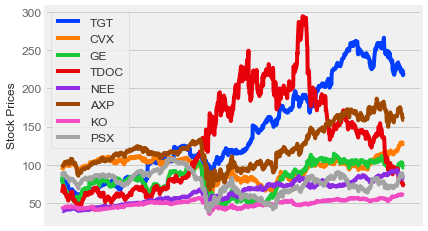

In [7]:
# Set the color palette
sb.set_palette(sb.color_palette("bright"))

# Plot all stocks
plt.plot(stocks_df)
plt.ylabel('Stock Prices')

# Do not show x-axis
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

# Add legends
plt.legend(['TGT', 'CVX', 'GE', 'TDOC', 'NEE', 'AXP', 'KO', 'PSX'], loc = "upper left")


# Display the plot
plt.show()

<b>Summary:</b>

- this graph showcase a plot that contains the trend for 8 stock prices in the past 3 years
- we can see that Teladoc Health(TDOC) has the highest surge in the stock price as compared to the other 7 stocks 
- perhaps Target(TGT) is relatively more stable as it has the second-highest stock price, despite its stock price did drop recently

In [8]:
# Summarize all stock prices
stocks_df.describe()

Symbols,TGT,CVX,GE,TDOC,NEE,AXP,KO,PSX
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,144.397585,96.865672,80.816373,130.425411,63.633677,122.961825,49.136419,76.163175
std,63.076554,13.723926,19.267083,62.595145,14.443673,27.511929,4.810748,14.240943
min,57.282162,49.326843,43.604053,42.880001,39.193474,67.033669,35.516022,38.522495
25%,89.271893,86.103508,63.722494,68.244999,51.165653,102.145294,44.923758,67.874329
50%,120.523499,100.580360,81.326340,135.399994,64.069366,115.985466,49.160164,77.347992
75%,201.171997,106.227474,99.917404,182.809998,74.464375,145.608833,53.084070,85.541931
max,266.390015,129.380005,114.523300,294.540009,93.360001,186.611649,61.389999,107.645660


<b>Summary:</b>

- as we can see, TGT and TDOC perhaps are the two most valuable stocks, per se, in terms of increase in stock prices, with min at 57 and 42 in 2018 as compared to recent times at 266 and 294, respectively 

In [9]:
# Create a correlation matrix
corr_matrix = stocks_df.corr(method='pearson')
corr_matrix

Symbols,TGT,CVX,GE,TDOC,NEE,AXP,KO,PSX
Symbols,,,,,,,,
TGT,1.000000,0.119024,0.660306,0.481205,0.930313,0.836453,0.764429,-0.177437
CVX,0.119024,1.000000,0.600704,-0.649795,-0.017369,0.580726,0.430316,0.798879
GE,0.660306,0.600704,1.000000,-0.029871,0.538040,0.879339,0.739384,0.416128
TDOC,0.481205,-0.649795,-0.029871,1.000000,0.611210,0.018260,0.063485,-0.633135
NEE,0.930313,-0.017369,0.538040,0.611210,1.000000,0.701062,0.747416,-0.315309
AXP,0.836453,0.580726,0.879339,0.018260,0.701062,1.000000,0.850844,0.253183
KO,0.764429,0.430316,0.739384,0.063485,0.747416,0.850844,1.000000,0.189728
PSX,-0.177437,0.798879,0.416128,-0.633135,-0.315309,0.253183,0.189728,1.000000


<b>Summary:</b> 

Using Pearson correlation method to calculate correlation coefficients: 
- correlation of 1 = perfect positive correlation 
- correlation of 0 = no correlation 
- correlation of -1 = perfect negative correlation, in other words, indicate an inverse relationship 
- NOTE: having a high correlation, doesn't necessarily imply causation 

<b>Some Interesting Findings:</b> 

- TGT is most closely correlated with NextEra Energy(NEE) and has an inverse relationship with Phillips66(PSX) 
- GE is most closely correlated with American Express(AXP) 
- TDOC is more closely correlated with NEE and has a very low relationship with the other 7 stocks 
- AXP and KO have positive correlation coefficients with all 7 stocks 

Overall, our portfolio is pretty diversify, as there are couple of stocks that have an inverse relationship with other stocks

Correlation Matrix - Stocks


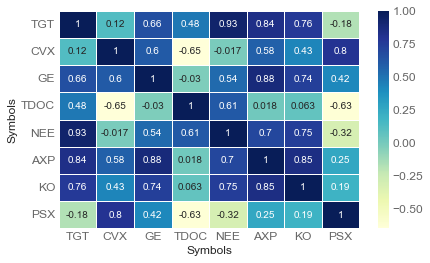

In [10]:
# Plot the corr matrix
fig1 = plt.figure()
sb.heatmap(corr_matrix,xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation Matrix - Stocks')
plt.show(fig1)

## II. Calculate the Percentage Changes and the Standard Deviation

In [11]:
# Calculate percentage changes for all stocks
stock_pct = stocks_df.pct_change()
stock_pct.head()
print(stock_pct.round(4)*100)

Symbols      TGT   CVX    GE  TDOC   NEE   AXP    KO   PSX
Date                                                      
2018-10-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2018-10-30  1.99  1.76 -8.78  6.28  0.45  0.88  2.52  3.59
2018-10-31 -2.50  0.72 -0.79  3.20 -0.61  0.64  0.52  0.74
2018-11-01  0.72 -0.43 -5.15  0.26 -1.18  1.28 -0.29 -0.31
2018-11-02  0.21  3.20 -3.03  4.30 -1.36 -0.32  0.54 -3.40
...          ...   ...   ...   ...   ...   ...   ...   ...
2022-01-18 -0.63  0.33 -0.26 -4.86 -2.34 -1.32 -0.80  0.09
2022-01-19  1.74 -0.36 -2.21 -0.25  1.65 -2.88  0.16 -1.60
2022-01-20 -0.95 -0.36 -2.36  0.90  1.11 -0.29 -0.41 -1.99
2022-01-21 -2.02 -1.20 -1.98 -4.32 -1.09 -1.35 -0.49 -2.41
2022-01-24  1.27  0.46  0.45  3.14 -0.73  0.11 -0.86 -0.64

[815 rows x 8 columns]


Now, we are done with data exploration, the first step is to calc. the percentage changes for each stock. The percentage changes are basically stock prices changes among each day. 

In [12]:
# Calculate the mean returns for all stocks
mean_daily = stock_pct.mean()
print(mean_daily)

# Print the overall mean returns for our portfolio 
print("Portfolio's Mean Returns:", str(np.round(mean_daily.mean().mean(), 4) * 100) + '%')

Symbols
TGT     0.001477
CVX     0.000686
GE      0.000617
TDOC    0.000901
NEE     0.001029
AXP     0.000936
KO      0.000551
PSX     0.000383
dtype: float64
Portfolio's Mean Returns: 0.08%


<b>Summary:</b> 
- our daily mean return is positive for all 8 stocks

In [13]:
# Define weights for each stock 
port_weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

<b>Summary:</b> 

The next step we should do is create a hypothetical portfolio and assign random weights to each selected stock. 
- created a dummy portfolio by assigning equal weights to each stock(all 8 stocks' weights will add up to 1). 
- will run a Monte Carlo simulation and use an optimal python package to optimize our portfolio weights

In [14]:
# Calculate the portfolio performance
stock_perf = np.sum(mean_daily*port_weights) 
print("Portfolio's Stock Performance", str(np.round(stock_perf, 4) * 100) + '%')

Portfolio's Stock Performance 0.08%


<b>Summary:</b> 

- our portoflio performance is around 8%, not exactly horrible as we are close to the average stock market return of 10% 
- our avg annual rate of return may able to improve after we run our simulation or use an optimal portfolio package to find our optimal portfolio weights

In [15]:
# Create a column named Portfolio
stock_pct['Portfolio']=stock_pct.dot(port_weights)

Let's create a column named "Portfolio", so we can track the daily cumumlative returns and to track it, we can use numpy's dot function to multiply the series of portfolio weights element-wise. 

In [16]:
# Calc. the cumulative returns
stock_cum_returns=(1+stock_pct).cumprod()
stock_cum_returns.head()

Symbols,TGT,CVX,GE,TDOC,NEE,AXP,KO,PSX,Portfolio
Date,,,,,,,,,
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,1.019857,1.017626,0.912186,1.062797,1.004456,1.008795,1.025183,1.035932,1.010854
2018-10-31,0.994411,1.024970,0.905018,1.096805,0.998379,1.015219,1.030564,1.043646,1.013308
2018-11-01,1.001546,1.020564,0.858423,1.099652,0.986630,1.028165,1.027551,1.040398,1.006840
2018-11-02,1.003686,1.053245,0.832437,1.146947,0.973203,1.024904,1.033147,1.004974,1.007030


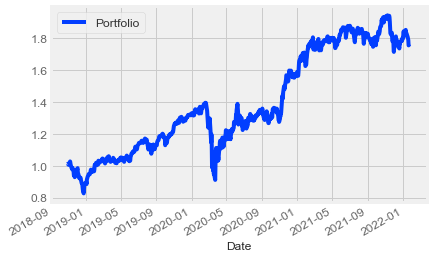

In [17]:
# Plot the cumulative port. returns only 
stock_port_return = stock_cum_returns['Portfolio']
ax = stock_port_return.plot()
plt.legend(['Portfolio'])

<b>Summary:</b> 

- as shown on the graph, overall, our cumulative portfolio returns have been increasing in the past year, except with a significant drop around 2020 which was expected 

<!-- # Write calculated stock percentage changes to a csv file
# stock_cum_returns.to_csv('stock_prices_cum', sep='\t', header=True)-->

<!-- # stock_cum_returns.loc[:,['Portfolio']]-->

In [18]:
# Calc. the log returns for all stocks
log_pct = stocks_df.pct_change()
log_returns = np.log(1+log_pct)
print(log_returns.round(4)*100)

Symbols      TGT   CVX    GE  TDOC   NEE   AXP    KO   PSX
Date                                                      
2018-10-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2018-10-30  1.97  1.75 -9.19  6.09  0.44  0.88  2.49  3.53
2018-10-31 -2.53  0.72 -0.79  3.15 -0.61  0.63  0.52  0.74
2018-11-01  0.71 -0.43 -5.29  0.26 -1.18  1.27 -0.29 -0.31
2018-11-02  0.21  3.15 -3.07  4.21 -1.37 -0.32  0.54 -3.46
...          ...   ...   ...   ...   ...   ...   ...   ...
2022-01-18 -0.63  0.33 -0.26 -4.99 -2.37 -1.33 -0.80  0.09
2022-01-19  1.73 -0.36 -2.23 -0.25  1.64 -2.92  0.16 -1.61
2022-01-20 -0.95 -0.36 -2.38  0.90  1.11 -0.29 -0.41 -2.01
2022-01-21 -2.04 -1.21 -2.00 -4.41 -1.10 -1.36 -0.50 -2.44
2022-01-24  1.26  0.46  0.45  3.09 -0.73  0.11 -0.86 -0.64

[815 rows x 8 columns]


Since we have a time-series data, it is probably better to calculate the log of stock return as later when we create the graph, it will look more smooth and allow us to easily identify trends

In [19]:
# Calculate the mean returns for all stocks
log_mean = log_returns.mean()
print(log_mean)

# Print the overall mean returns for our portfolio 
print("Portfolio's Mean Returns:", str(np.round(log_mean.mean().mean(), 4) * 100) + '%')

Symbols
TGT     0.001271
CVX     0.000385
GE      0.000163
TDOC    0.000213
NEE     0.000874
AXP     0.000611
KO      0.000440
PSX    -0.000037
dtype: float64
Portfolio's Mean Returns: 0.05%


<b>Summary:</b> 

- after we take the log of our stock return, our portfolio mean return is 5% as compared to 8% 

In [20]:
# Calc. the annual covariance matrix on log returns
daily_cov_matrix = (log_returns.cov()) * 252
daily_cov_matrix

Symbols,TGT,CVX,GE,TDOC,NEE,AXP,KO,PSX
Symbols,,,,,,,,
TGT,0.102373,0.036712,0.035745,0.039574,0.031435,0.040400,0.023070,0.037837
CVX,0.036712,0.153183,0.107179,-0.008732,0.043302,0.117330,0.049485,0.137918
GE,0.035745,0.107179,0.228793,0.003691,0.037282,0.116200,0.049157,0.124126
TDOC,0.039574,-0.008732,0.003691,0.347703,0.015609,-0.010847,-0.009586,-0.007449
NEE,0.031435,0.043302,0.037282,0.015609,0.078320,0.050649,0.040197,0.037458
AXP,0.040400,0.117330,0.116200,-0.010847,0.050649,0.162446,0.056790,0.131966
KO,0.023070,0.049485,0.049157,-0.009586,0.040197,0.056790,0.055868,0.052832
PSX,0.037837,0.137918,0.124126,-0.007449,0.037458,0.131966,0.052832,0.212086


<b>Summary:</b> 

Covariance is a measure of the relationship between two assets' returns. 
- annualized our volatility by multiplying to 252, which is the number of trading days in a year 
- as we can see overall, these stocks' returns in our portfolio typically don't move in the same direction as others, which is a good sign 

Earlier, we calculate the correlation of our stocks, now, let's use covariance to find the standard deviation of our portfolio. 

In [21]:
# Calculate the portfolio variance
port_var = np.dot(port_weights.T, np.dot(daily_cov_matrix, port_weights))
print(str(np.round(port_var, 4) * 100) + '%')

# Calc. standard deviation( risk of the portfolio) 
port_std = np.sqrt(np.dot(port_weights.T, np.dot(daily_cov_matrix, port_weights)))
print(str(np.round(port_std, 4) * 100) + '%')

6.41%
25.31%


<b>Summary</b>:

- since standard deviation measures how data is dispersed relative to the mean, a 25.31% of std indicate our portfolio contains much risker assets as compared to a lower std
- maybe later, we can reduce our portfolio risk by finding the optimal portfolio weights as portfolio weights were used to calculate both portfolio variance & standard deviation

## III. Calculate the Annualized Returns & Sharpe Ratio For All Stocks & SP500 Indexes

### A. Examine Annualized Returns & Sharpe Ratio for Each Stock

#### Annualized Returns for Each Stock

In [22]:
# Calc. the number of months between today's date and the start date(so the months will be updated)
start_date = datetime.datetime(2018, 10, 29)
end_date = datetime.date.today()
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
print(num_months)

39


In [23]:
# Calc. the total rate of return for all stocks from start to the end
total_return = (stocks_df.iloc[-1] - stocks_df.iloc[0]) / stocks_df.iloc[0]
total_return

Symbols
TGT     1.814941
CVX     0.367746
GE      0.142206
TDOC    0.189339
NEE     1.036121
AXP     0.645016
KO      0.430958
PSX    -0.029826
dtype: float64

In [24]:
# Calc. the annualized total return over months 
ann_return = ((1 + total_return)**(12/num_months))-1
ann_return

Symbols
TGT     0.374986
CVX     0.101153
GE      0.041760
TDOC    0.054802
NEE     0.244562
AXP     0.165504
KO      0.116568
PSX    -0.009274
dtype: float64

<b>Summary:</b> 

The annualized rate of return is the geometric average of money earned in a portfolio in a given year. 
- TGT has the highest annualized total return in one year 
- PSX has the lowest annualized total return in one year, its annualized total return is negative 0.01% 

#### Sharpe Ratio for Each Stock

In [25]:
API_key = '29d5c4811e76f2deb84b5c62f4b13d38'

In [26]:
# Retrieve the risk free rate via API so it can be updated automatically
start = '2020/12/21'
today = datetime.date.today()  # grab today's date
treasury = web.DataReader(['TB3MS'], 'fred', start='2020/12/21', end= today)
risk_free = float(treasury.iloc[-1])

In [27]:
# print the risk_free
risk_free

0.06

According to investopedia.com, the 3-month treasury yield is normally used as a proxy for the risk free rate in the sharpe ratio formula. 

In [28]:
# Calc. the ann. volatility from the std 
stocks_change = stocks_df.pct_change()
ann_stdv_stock = stocks_change.std() * np.sqrt(250)
ann_stdv_stock

Symbols
TGT     0.322949
CVX     0.385999
GE      0.476754
TDOC    0.586019
NEE     0.278461
AXP     0.407021
KO      0.234033
PSX     0.459760
dtype: float64

In [29]:
# Calc. the annualized Sharpe Ratio for each stock 
sharpe_ratio = ((ann_return - risk_free) / ann_stdv_stock)
sharpe_ratio

Symbols
TGT     0.975343
CVX     0.106615
GE     -0.038260
TDOC   -0.008870
NEE     0.662793
AXP     0.259211
KO      0.241710
PSX    -0.150673
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}, xlabel='Symbols'>

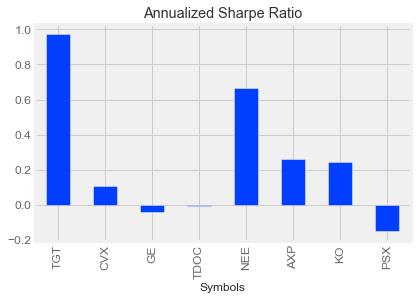

In [30]:
# Plot the sharpe ratio for each stock
sharpe_ratio.plot(kind="bar", title="Annualized Sharpe Ratio")

<b>Summary:</b> 

Let's use one of the most common risk-adjusted return ratios - Sharpe Ratio, which describes how much excess return we would receive for the volatility of holding our relatively risky portfolio. 
- Sharpe ratio > 1 is generally considered "good", so in our portfolio, TGT's Sharpe ratio has the closest Sharpe ratio close to one, which indicates it offers more excess returns relative to its annualized volatility of 0.32
- GE, TDOC, PSX all have negative Sharpe ratio, which could indicate that the risk-free rate is greater than the stock's return or the portfolio return is negative 
- with these findings, we can allocate less weight to these three stocks 

### B. Examine Annualized Returns & Sharpe Ratio for ETF

#### Annualized Returns for IVV

In [31]:
# Retrieve the daily return of IVV
tickers = ['IVV']
etf = pdr.get_data_yahoo(tickers,
                           '2018/10/29',
                             today)
# SP500_df.set_index('Date', inplace=True, drop=True)

NOTE: iShares Core S&P 500 ETF's holdings contain a majority of our stocks, except TDOC( Teladoc Health). 

In [32]:
# Retrieve only the Adj. Close col
etf_df = etf['Adj Close']
etf_df.head()

Symbols,IVV
Date,
2018-10-29,249.948532
2018-10-30,253.947968
2018-10-31,256.676941
2018-11-01,259.180084
2018-11-02,257.740387


In [33]:
# Check to see if there are any missing values in the stocks_df
etf_df.isnull().sum()

Symbols
IVV    0
dtype: int64

In [34]:
# Summarize the IVV's index returns
etf_df.describe()

Symbols,IVV
count,815.000000
mean,337.402384
std,70.215893
min,217.457001
25%,279.692261
50%,316.665375
75%,403.289551
max,479.839996


In [35]:
# Calculate the total return 
total_etf_returns = (etf_df.iloc[-1] - etf_df.iloc[0]) / etf_df.iloc[0]
print(str(np.round(total_etf_returns, 4) * 100) + '%')

Symbols
IVV    76.74
dtype: float64%


In [36]:
# Calc. the annualized total return over months 
ann_etf_return = ((1 + total_etf_returns)**(12/num_months))-1
print(str(np.round(ann_etf_return, 4) * 100) + '%')

Symbols
IVV    19.15
dtype: float64%


Let's see after we arrived at the optimal portfolio weights, if our portfolio's annualized total return could be close to 19%. 

#### Sharpe Ratio for IVV

In [37]:
# Calc. the percentage change 
etf_pct = etf_df.pct_change()

In [38]:
# Calc. the ann. volatility from the std
ann_vol_etf = etf_pct.std() * np.sqrt(250)
print(str(np.round(ann_vol_etf, 4) * 100) + '%')

Symbols
IVV    22.38
dtype: float64%


In [39]:
# Calc. the Sharpe Ratio 
etf_sharpe = ((ann_etf_return - risk_free)/ann_vol_etf)
etf_sharpe

Symbols
IVV    0.587785
dtype: float64

The sharpe ratio for IVV aren't really high, not even close to 1. 

<AxesSubplot:title={'center':'Annualized Sharpe Ratio - IVV'}, xlabel='Symbols'>

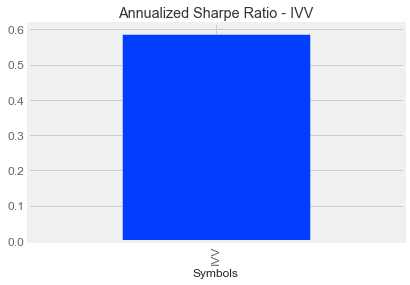

In [40]:
# Plot the sharpe ratio for IVV
etf_sharpe.plot(kind="bar", title="Annualized Sharpe Ratio - IVV")

## IV. Examine Skewness & Kurtosis Of Selected Stocks and ETFs

### A. Examine Skewness & Kurtosis of Individual Stocks Only

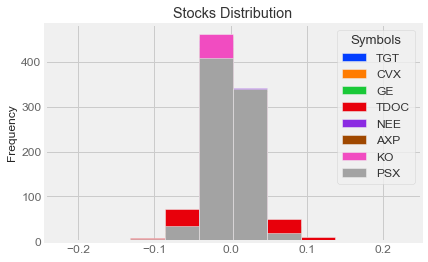

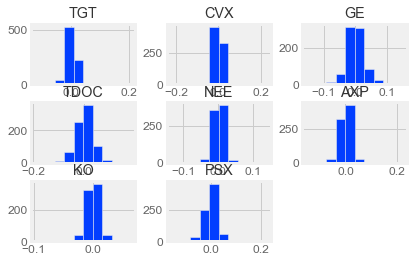

In [41]:
# Print the histogram of the portfolio
stocks_df.pct_change().plot.hist(title='Stocks Distribution')
stocks_df.pct_change().hist()
plt.show()

In [42]:
# # Print the skewness of each stock's pct changes
print("Stocks'Skewness:", stocks_df.pct_change().skew())

Stocks'Skewness: Symbols
TGT     1.536351
CVX    -0.269953
GE      0.182222
TDOC    0.029288
NEE     0.026938
AXP     1.461060
KO     -0.726874
PSX     0.419052
dtype: float64


<b>Interesting Findings:</b> 

Skewness is a measure of symmetry or it measures how distributed the data is from the left and right of the center point. 

Based on the Skewness' Rule of Thumb: 
- TGT and AXP have a highly skewed distribution, which indicates that the distribution has a bump towards the left of the center point and is not good for investing as a large proportion of returns are going to be below the mean 
- KO has a moderately skewed distribution
- GE, TDOC, NEE,  CVX, and PSX are  approximately symmetric distribution 


In [43]:
# Print the kurtosis of each stock's pct changes
print("Stocks'Kurtosis:", stocks_df.pct_change().kurtosis())

Stocks'Kurtosis: Symbols
TGT     20.206744
CVX     23.319091
GE       3.665564
TDOC     3.071349
NEE     13.396018
AXP     19.501759
KO       8.394567
PSX      8.626636
dtype: float64


<b>Interesting Findings:</b> 

Kurtosis is a measure of whether the data is heavy-tailed or light-tailed compared to a normal distribution. 

Kurtosis' Rule of Thumb: 
- all of the 8 stocks have a kurtosis above 3(known as leptokurtic),  which implies that the stocks have slightly fatter tails and is not desirable for us

In [44]:
# Print the kurtosis of cumulative portfolio's pct changes
print("Stocks'Kurtosis:", stock_port_return.kurtosis())

Stocks'Kurtosis: -1.3775944912219533


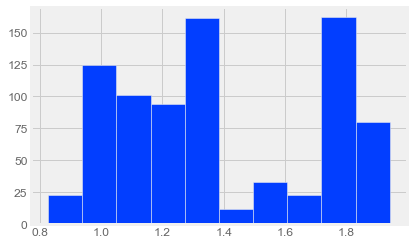

In [45]:
# Print the histogram of the portfolio
stock_port_return.hist()
plt.show()

### B. Examine Skewness & Kurtosis of ETF Only

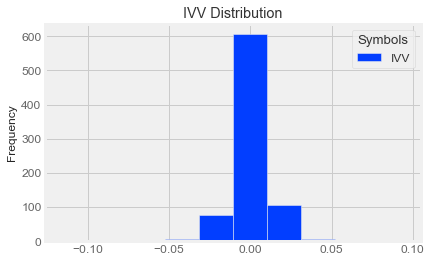

In [46]:
# Create a histogram of the S&P500 returns and show the plot
etf_pct.plot.hist(title='IVV Distribution')
plt.show()

In [47]:
# Print the skewness of the indexes
print("Indexes'skewness:", etf_pct.skew())

Indexes'skewness: Symbols
IVV   -0.631392
dtype: float64


In [48]:
# Print the kurtosis of the indexes
print("Indexes'kurtosis:", etf_pct.kurtosis())

Indexes'kurtosis: Symbols
IVV    15.694062
dtype: float64


<b>Interesting Findings:</b> 
- according to the skewness' rule of thumb, having a -0.63 indicates that IVV has a moderately skewed distribution 
- compared to some of our stocks, IVV also has a slightly fatter tail, and this is undesirable for interested investors

### V. Calculate the Sortino Ratio for our Portfolio

In [49]:
# Define the target return as 0.10
target = 0.10

Let's make our target return as 10% as the stocks in our portfolio are considered long-term investments, so a 10% target return should be a good ROI.

In [50]:
# Create a downside return col. with neg. return only
port_return_series = pd.Series(stock_port_return)  # tells python it is a series data structure, not df
downside_returns = port_return_series.loc[port_return_series < target]
downside_returns

Series([], Name: Portfolio, dtype: float64)

In [51]:
# # Calc. the expected return and std dev of the downside
expected_return = pd.Series(stock_port_return).mean()
down_stdev = pd.Series(stock_port_return).std()

In [52]:
# Calc. the Sortino Ratio
sortino_ratio = (expected_return - risk_free) / (down_stdev)

In [53]:
# Print the results
print("Expected Return:", expected_return*100)
print("Downside Risk:", down_stdev*100)
print("Sortino Ratio:", sortino_ratio)

Expected Return: 139.02329968556933
Downside Risk: 31.7601892087009
Sortino Ratio: 4.188366096040975


<b>Summary:</b> 

Sortino Ratio is a variation of the Sharpe Ratio that only factors in downside risk as compared to Sharpe Ratio, which penalizes both upside and downside risk.
- as a rule of thumb, a Sortino ratio of 4.18 for our portfolio is considered ideal, which indicates our portfolio is operating efficiently  for the amount of risk we take in

## VI. Investigate The Fama French 5-Factor Model

In [54]:
# Read the fama french 5 factors file
ff5_factors = pd.read_csv('Fama_French_5_Factors.CSV', index_col=0, parse_dates=[0])
ff5_factors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 778 entries, 2018-10-29 to 2021-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  778 non-null    float64
 1   SMB     778 non-null    float64
 2   HML     778 non-null    float64
 3   RMW     778 non-null    float64
 4   CMA     778 non-null    float64
 5   RF      778 non-null    float64
dtypes: float64(6)
memory usage: 42.5 KB


In [55]:
# Print the first row and last row of fama-french 5 dataset 
print(ff5_factors.head(n=1))
print(ff5_factors.tail(n=1))

            Mkt-RF  SMB   HML   RMW   CMA     RF
Date                                            
2018-10-29   -0.77 -0.1  1.61 -0.01  0.97  0.008
            Mkt-RF   SMB   HML   RMW  CMA   RF
Date                                          
2021-11-30   -1.95  0.16 -1.12 -0.16  0.4  0.0


In [56]:
# Grab the last date of fama-french 5 factors dataset
ff5_date = ff5_factors.index[ff5_factors.shape[0] - 1].date()
ff5_date

datetime.date(2021, 11, 30)

Since the last date of our fama-french 5 factors data set ends on 11/30/21 and it is different from our stocks data set, we need to make sure that as we are comparing to the stocks data set, it also needs to end on 11/30/21. 

In [57]:
# Grab our stocks_df data only upto our fama-french 5 factors dataset 
# price_data = stocks_df.iloc[:ff5_date]
new_stocks = stocks_df.loc['2018-10-29':'2021-11-30']

# Print the first row and last row of new_stock
print(new_stocks.head(n=1))
print(new_stocks.tail(n=1))

Symbols           TGT        CVX         GE       TDOC        NEE        AXP  \
Date                                                                           
2018-10-29  78.157944  93.219093  84.687035  63.220001  40.272663  96.606934   

Symbols            KO        PSX  
Date                              
2018-10-29  41.881031  85.453758  
Symbols            TGT         CVX         GE    TDOC        NEE         AXP  \
Date                                                                           
2021-11-30  243.839996  112.870003  94.906898  101.25  86.779999  151.918716   

Symbols            KO        PSX  
Date                              
2021-11-30  52.450001  69.169998  


In [58]:
# Calculate the percentage change for our newly created stocks df
new_pct = new_stocks.pct_change()
type(new_pct)

pandas.core.frame.DataFrame

In [72]:
# Assign a name to the series and named it as Portfolio 
new_stock_port = new_stock_port.rename('Portfolio')
new_stock_port.head()

Date
2018-10-29         NaN
2018-10-30    0.010854
2018-10-31    0.002427
2018-11-01   -0.006383
2018-11-02    0.000189
Name: Portfolio, dtype: float64

In [73]:
# Merging the new stocks df with the fama-french 5 factors 
all_data = pd.merge(ff5_factors, pd.DataFrame(new_stock_port), how = 'inner', left_index= True, right_index= True)
all_data.head()

# Calculate the excess returns
all_data['Port_Excess'] = all_data['Portfolio'] - all_data['RF']
print(all_data.tail())

# Rename the columns
all_data.rename(columns={"Mkt-RF":"Mkt_Excess"}, inplace=True)

# Build a regression model 
model = smf.formula.ols(formula = "Port_Excess ~ Mkt_Excess + SMB + HML + RMW + CMA + RF", data = all_data).fit()
model.summary()

            Mkt-RF   SMB   HML   RMW   CMA   RF  Portfolio  Port_Excess
Date                                                                   
2021-11-23   -0.03 -0.17  1.74  0.23  1.16  0.0   0.003217     0.003217
2021-11-24    0.30 -0.15 -0.86 -0.52 -0.20  0.0   0.004311     0.004311
2021-11-26   -2.22 -1.30 -0.93  0.26 -0.59  0.0  -0.029100    -0.029100
2021-11-29    1.11 -1.31 -0.87  0.40 -0.33  0.0   0.006389     0.006389
2021-11-30   -1.95  0.16 -1.12 -0.16  0.40  0.0  -0.027452    -0.027452


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Port_Excess   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     850.7
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:03:22   Log-Likelihood:                 2868.1
No. Observations:                 777   AIC:                            -5722.
Df Residuals:                     770   BIC:                            -5690.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.000     -0.550      0.583      -0.001       0.000
Mkt_Excess     0.0096      0.000     60.096      0.000       0.009       0.010
SMB            0.0002      0.000      0.703      0.483      -0.000       0.001
HML            0.0033      0.000     11.615      0.000       0.003       0.004
RMW           -0.0030      0.000     -6.263      0.000      -0.004      -0.002
CMA            0.0022      0.001      3.613      0.000       0.001       0.003
RF            -0.8983      0.052    -17.140      0.000      -1.001      -0.795
==============================================================================
Omnibus:                       65.690   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.082
Skew:                           0.241   Prob(JB):                     5.58e-62
Kurtosis:                       5.912   Cond. No.                         364.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Summary:</b> 

<b>Market Risk Premium:</b> is the rate at which investing in the market outperforms investing in a zero-risk asset
- this is the return we get for investing in this portfolio - 0.0096 

<b>Small Minus Big(SMB):</b> accounts for publicly traded companies with small caps 
- our coefficient is extremely close to 0, indicating that the portfolio's excess return is not really achieved smaller size companies

<b>High Minus Low(HML):</b> accounts for value stocks with high book-to-market ratios 
- the coefficient is 0.0033, which could indicate the portfolio's excess return is attributed to value stocks 

<b>Robust Minus Weak(RMW):</b> accounts for the difference in returns between firms with robust and weak profitability 
- the negative RMW coefficient indicates that our portfolio is consists of stocks with high market beta

<b>Conservation Minus Aggressive(CMA):</b> an investment factor that accounts for the difference between the returns of firms that invest conservatively vs aggressively 
- the positive CMA coefficient indicates that the excess portfolio return is attributed to firms that invest conservatively 

In [74]:
# Calc. fama_df corr. 
all_data.corr()

,Mkt_Excess,SMB,HML,RMW,CMA,RF,Portfolio,Port_Excess
Mkt_Excess,1.000000,0.201368,0.136338,0.019548,-0.169366,-0.041724,0.890274,0.868655
SMB,0.201368,1.000000,0.475479,-0.122714,0.165266,-0.054658,0.322748,0.324822
HML,0.136338,0.475479,1.000000,0.420270,0.556061,-0.036674,0.355222,0.352151
RMW,0.019548,-0.122714,0.420270,1.000000,0.366512,-0.040759,0.034887,0.043806
CMA,-0.169366,0.165266,0.556061,0.366512,1.000000,-0.020533,0.012720,0.018131
RF,-0.041724,-0.054658,-0.036674,-0.040759,-0.020533,1.000000,-0.016414,-0.265572
Portfolio,0.890274,0.322748,0.355222,0.034887,0.012720,-0.016414,1.000000,0.968320
Port_Excess,0.868655,0.324822,0.352151,0.043806,0.018131,-0.265572,0.968320,1.000000


## VII. Monte Carlo Simulation 

In [83]:
# Compute stock returns and print the returns in percentage format
stock_pct = stocks_df.pct_change()
print (stock_pct.round(4)*100)

Symbols      TGT   CVX    GE  TDOC   NEE   AXP    KO   PSX
Date                                                      
2018-10-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2018-10-30  1.99  1.76 -8.78  6.28  0.45  0.88  2.52  3.59
2018-10-31 -2.50  0.72 -0.79  3.20 -0.61  0.64  0.52  0.74
2018-11-01  0.72 -0.43 -5.15  0.26 -1.18  1.28 -0.29 -0.31
2018-11-02  0.21  3.20 -3.03  4.30 -1.36 -0.32  0.54 -3.40
...          ...   ...   ...   ...   ...   ...   ...   ...
2022-01-18 -0.63  0.33 -0.26 -4.86 -2.34 -1.32 -0.80  0.09
2022-01-19  1.74 -0.36 -2.21 -0.25  1.65 -2.88  0.16 -1.60
2022-01-20 -0.95 -0.36 -2.36  0.90  1.11 -0.29 -0.41 -1.99
2022-01-21 -2.02 -1.20 -1.98 -4.32 -1.09 -1.35 -0.49 -2.41
2022-01-24  1.27  0.46  0.45  3.14 -0.73  0.11 -0.86 -0.64

[815 rows x 8 columns]


In [76]:
# Calc. arithmetic mean daily return
# Calc. arithmetic cov matrix
mean_ret = stock_pct.mean()
covariance_matrix = stock_pct.cov()

print(mean_ret)
print(covariance_matrix)

Symbols
TGT     0.001477
CVX     0.000686
GE      0.000617
TDOC    0.000901
NEE     0.001029
AXP     0.000936
KO      0.000551
PSX     0.000383
dtype: float64
Symbols       TGT       CVX        GE      TDOC       NEE       AXP        KO  \
Symbols                                                                         
TGT      0.000417  0.000145  0.000140  0.000151  0.000124  0.000160  0.000090   
CVX      0.000145  0.000596  0.000420 -0.000036  0.000172  0.000467  0.000194   
GE       0.000140  0.000420  0.000909  0.000009  0.000146  0.000463  0.000192   
TDOC     0.000151 -0.000036  0.000009  0.001374  0.000057 -0.000049 -0.000040   
NEE      0.000124  0.000172  0.000146  0.000057  0.000310  0.000201  0.000158   
AXP      0.000160  0.000467  0.000463 -0.000049  0.000201  0.000663  0.000225   
KO       0.000090  0.000194  0.000192 -0.000040  0.000158  0.000225  0.000219   
PSX      0.000147  0.000546  0.000487 -0.000036  0.000143  0.000533  0.000208   

Symbols       PSX  
Symbols   

In [77]:
# Calc. the log returns for all stocks
log_change = stocks_df.pct_change()
log_return = np.log(1+log_change)
log_return

Symbols,TGT,CVX,GE,TDOC,NEE,AXP,KO,PSX
Date,,,,,,,,
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,0.019662,0.017473,-0.091911,0.060904,0.004446,0.008757,0.024871,0.035301
2018-10-31,-0.025267,0.007191,-0.007890,0.031497,-0.006068,0.006347,0.005235,0.007419
2018-11-01,0.007149,-0.004308,-0.052858,0.002593,-0.011838,0.012671,-0.002928,-0.003117
2018-11-02,0.002135,0.031521,-0.030739,0.042110,-0.013703,-0.003177,0.005431,-0.034642
...,...,...,...,...,...,...,...,...
2022-01-18,-0.006298,0.003252,-0.002621,-0.049859,-0.023716,-0.013331,-0.008014,0.000903
2022-01-19,0.017259,-0.003639,-0.022309,-0.002513,0.016358,-0.029188,0.001641,-0.016146
2022-01-20,-0.009516,-0.003575,-0.023836,0.008965,0.011078,-0.002916,-0.004107,-0.020147


In [78]:
# Create random seeds so code can be reproduced
np.random.seed(123)

# # Define the an array which the numbers of simulation would be execute
num_simulation = 1000
# # get the number of columns in stocks_df, [1] to acess the 2nd element of tuple which is column
all_weights = np.zeros((num_simulation, stocks_df.shape[1])) 
# Create three arrays to save all stock returns, volatility, and sharpe ratios for the numbers of times simulation is run
returns = np.zeros(num_simulation) 
volatility = np.zeros(num_simulation)
mc_sr = np.zeros(num_simulation)



# Create a for loop to run the simulation 
for i in range(num_simulation): 
    # weights 
    weights = np.array(np.random.random(8)) 
    weights = weights/np.sum(weights)
#     weights.append(weights)

    # save the simulated portfolio weights
    all_weights[i,:] = weights

    # expected stock return 
    returns[i] = np.sum((log_return.mean()*weights)*252)

    # expected standard deviation 
    volatility[i] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    mc_sr[i] = (returns[i] - risk_free) / volatility[i]

In [79]:
# Create a df of optimized port. weights with the respective ticker
ticker = ['TGT', 'CVX', 'GE', 'TDOC', 'NEE', 'AXP', 'KO', 'PSX']
pd.DataFrame(list(zip(ticker, all_weights[mc_sr.argmax()])), columns=['Ticker', 'Port_Weight'])

,Ticker,Port_Weight
0,TGT,0.333774
1,CVX,0.110099
2,GE,0.033067
3,TDOC,0.013136
4,NEE,0.321334
5,AXP,0.043594
6,KO,0.104847
7,PSX,0.040148


In [88]:
# Retrieve the max. sharpe ratio 
mc_sr.max()

0.6444469775075233

In [89]:
# Retrieve the max. 
port_sr = (ann_return - risk_free) / ann_stdv_stock
port_sr.max()

0.9753428648748593

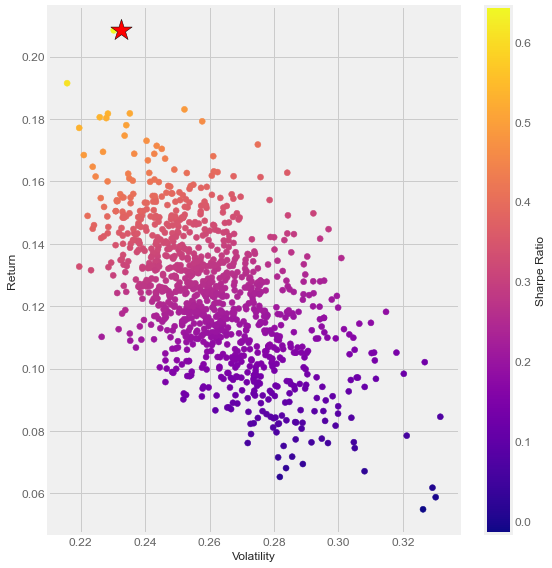

In [91]:
plt.figure(figsize=(8,8));
plt.scatter(volatility,returns,c=mc_sr,cmap='plasma');
plt.colorbar(label='Sharpe Ratio');
plt.xlabel('Volatility');
plt.ylabel('Return');

# Add a star to represent max SR
plt.scatter(volatility[sharpe_ratio.argmax()], returns[mc_sr.argmax()],
            c='red',s=500,edgecolors='black', marker='*')
             
plt.tight_layout()
plt.show()

<b>Summary:</b> 
- surprisingly, our random portfolio weight of 0.125 for each stock has a higher Sharpe ratio than the maximum Sharpe ratio produced by running a Monte Carlo simulation 
- Let's see what the scripy package would produce in terms of portfolio weights and Sharpe ratio. 

## VIII. Using Scipy Package to Optimze Portfolio

### A. Optimal Portfolio Weights for Negative Sharpe Ratio

In [92]:
# Define a function which will return the portfolio returns, volatility, sharpe ratio 
# This function will be used later to calc. the port. weights at minimal volatility and negative sharpe ratio 
def ret_vol_sharpe_func(weights): 
    weights = np.array(weights)
    returns = np.sum((log_return.mean()*weights)*252)
    volatility = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
    # sharpe_ratio = (returns - risk_free) / volatility
    sharpe_ratio = returns / volatility
    # risk_free
    # return np.array([returns, volatility, sharpe_ratio])
    return returns, volatility, sharpe_ratio

In [93]:
# Goal 1 => Find optimal port. weights while minimizing negative Sharpe Ratio 
# Create an objective function called neg_sharpe 
# def neg_sharpe(weights, returns, volatility, sharpe_ratio):
def neg_sharpe(weights):
    # Access the third index of the above def function 
    return  ret_vol_sharpe_func(weights)[2] * -1 # multiply by -1 because scipy can only take minimize

# Create constraints & make sure total weights add up to 1
constraints = ({'type':'eq','fun': lambda x: np.sum(x) - 1})

# Create boundaries for port. weights whose boundary starts from 0 and ends on 1 
boundaries = tuple((0,1) for stock in range(stocks_df.shape[1]))

# Randomly assign equal weights to our portfolio and saved in array form
random_weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

# Using scipy's built-in function minimize and sequential least sq. programming method to calc. the opt. sharpe ratio 
optimized_sharpe = sco.minimize(neg_sharpe, random_weights, method="SLSQP", bounds=boundaries,constraints=constraints)
optimized_sharpe

     fun: -1.1039072059968242
     jac: array([ 6.59525394e-05,  2.95014635e-01,  4.63266864e-01,  3.01267982e-01,
       -9.62018967e-05,  1.58474818e-01,  7.88136870e-02,  6.85358509e-01])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([5.93285064e-01, 2.53378048e-16, 0.00000000e+00, 0.00000000e+00,
       4.06714936e-01, 1.33356867e-17, 3.63207728e-17, 0.00000000e+00])

In [94]:
# Make sure portfolio weights add up to 1
np.sum(optimized_sharpe.x)

1.0000000000000004

In [95]:
optimized_sharpe.x

array([5.93285064e-01, 2.53378048e-16, 0.00000000e+00, 0.00000000e+00,
       4.06714936e-01, 1.33356867e-17, 3.63207728e-17, 0.00000000e+00])

In [191]:
# Create a df of optimized port. weights with the respective ticker
ticker = ['TGT', 'CVX', 'GE', 'TDOC', 'NEE', 'AXP', 'KO', 'PSX']
pd.DataFrame(list(zip(ticker, optimized_sharpe.x)), columns=['Ticker', 'Port_Weight'])

,Ticker,Port_Weight
0,TGT,5.904118e-01
1,CVX,0.000000e+00
2,GE,1.337905e-16
3,TDOC,0.000000e+00
4,NEE,4.095882e-01
5,AXP,0.000000e+00
6,KO,1.853986e-17
7,PSX,8.001412e-17


In [96]:
# Retrieve the optimal result of Sharpe ratio 
# optimized_sharpe.x
ret_vol_sharpe_func(optimized_sharpe.x)

(0.2796173329116875, 0.2532978599946669, 1.1039072059968242)

<b>Summary:</b> 

- this time using the scipy package to find the optimal portfolio weights while minimizing the negative Sharpe ratio, our Sharpe Ratio is the highest compared to the result from running the Monte Carlo simulation or our randomized portfolio weight example 
- based on the above table, we can see that scipy suggests we should allocate more weights to Target and NextEra Energy while allocating 0 weight to Chevron and American Express 

Let's see what will scipy package suggests if we want to minimize volatility. 

### B. Optimal Portfolio Weights for Minimal Volatility

In [97]:
# Goal 2 => Find optimal port. weights while minimizing volatility 
# Define the array 
def ret_vol_func(weights): 
    weights = np.array(weights)
    returns = np.sum((log_return.mean()*weights)*252)
    volatility = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
    # return np.array([returns, volatility, sharpe_ratio])
    return returns, volatility

In [98]:
def vol(weights):
    # Access the third index of the above def function 
    return  ret_vol_func(weights)[1] 

# Create constraints & make sure total weights add up to 1
constraints = (# The weights must sum up to one.
    {"type":"eq", "fun": lambda x: np.sum(x) - 1}, 
    # This constraints says that the inequalities (ineq) must be non-negative.
    # The expected daily return of our portfolio and we want to be at greater than 0.003
    {"type": "ineq", "fun": lambda x: np.sum(stocks_df.mean()*x)-0.003}) 

# # Create boundaries for port. weights whose boundary starts from 0 and ends on 1 
boundaries = tuple((0,1) for stock in range(stocks_df.shape[1]))

# Randomly assign equal weights to our portfolio and saved in array form
random_weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

# Using scipy's built-in function minimize and sequential least sq. programming method to find the minimal volatility or stv
optimized_volatility = sco.minimize(vol, random_weights, method="SLSQP", bounds=boundaries,constraints=constraints)
optimized_volatility

     fun: 0.20191419109474049
     jac: array([0.20186281, 0.20205061, 0.20180234, 0.20212413, 0.20184282,
       0.22860607, 0.20190615, 0.20920621])
 message: 'Optimization terminated successfully'
    nfev: 90
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.86492959e-01, 6.28746322e-03, 3.40787931e-04, 1.06503939e-01,
       1.25706641e-01, 8.67361738e-18, 5.74668209e-01, 0.00000000e+00])

In [99]:
# Make sure portfolio weights add up to 1
np.sum(optimized_volatility.x)

1.0000000000000002

In [100]:
# Create a df of optimized port. weights with the respective ticker
pd.DataFrame(list(zip(ticker, optimized_volatility.x)), columns=['Ticker', 'Port_Weight'])

,Ticker,Port_Weight
0,TGT,1.864930e-01
1,CVX,6.287463e-03
2,GE,3.407879e-04
3,TDOC,1.065039e-01
4,NEE,1.257066e-01
5,AXP,8.673617e-18
6,KO,5.746682e-01
7,PSX,0.000000e+00


In [101]:
# Retrieve the optimal result of minimal volatility 
optimized_volatility.x
ret_vol_func(optimized_volatility.x)

(0.1575165244840229, 0.20191419109474049)

<b>Summary:</b> 

- if our goal is to minimize volatility, then according to what the scipy package suggests is to invest more  in Target and NextEra, and invest 0 weight in Phillips 

## IX. Tear Sheet

### A. Using Quantstats Package to Create a Tear Sheet for QQQ

In [116]:
# Save the best optimal portfolio weights for the maximum sharpe ratio in ticker variable
tickers = {'TGT':5.904118e-01, 
           'CVX':0.000000e+00, 
           'GE':1.337905e-16, 
           'TDOC':0.000000e+00, 
           'NEE':4.095882e-01, 
           'AXP':0.000000e+00, 
           'KO':1.853986e-17, 
           'PSX':8.001412e-17}
# Generate a complete tear sheet report of optimal stock portfolio weights 
# and compare to the benchmark - QQQ
stocks_port = portfolio = qs.utils.make_index(tickers)
qs.reports.html(stocks_port, "IVV", title=" Stocks vs IVV")

<b>Summary:</b> 

- created a tear sheet by using the quantstats package which calculates some of the metrics we calculated manually earlier 
- the tear sheet provides a display of some graphs, and ratios of our stocks vs IVV